In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define paths to the train and test datasets
train_data_dir = r"C:\Users\Prabhjot Singh\Desktop\ml files\archive\train"
test_data_dir = r"C:\Users\Prabhjot Singh\Desktop\ml files\archive\test"



In [2]:

# Data preprocessing and augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:

# Create generators for loading and augmenting data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'  # 'binary' because it's a binary classification (cats and dogs)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model using the generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10


625/625 [==============================] - 1140s 2s/step - loss: 0.6731 - accuracy: 0.5837 - val_loss: 0.5988 - val_accuracy: 0.6803
Epoch 2/10
625/625 [==============================] - 996s 2s/step - loss: 0.5764 - accuracy: 0.6952 - val_loss: 0.5351 - val_accuracy: 0.7220
Epoch 3/10
625/625 [==============================] - 1029s 2s/step - loss: 0.5070 - accuracy: 0.7520 - val_loss: 0.4737 - val_accuracy: 0.7710
Epoch 4/10
625/625 [==============================] - 1065s 2s/step - loss: 0.4688 - accuracy: 0.7797 - val_loss: 0.4159 - val_accuracy: 0.8135
Epoch 5/10
625/625 [==============================] - 952s 2s/step - loss: 0.4255 - accuracy: 0.8087 - val_loss: 0.4373 - val_accuracy: 0.8075
Epoch 6/10
625/625 [==============================] - 1002s 2s/step - loss: 0.3975 - accuracy: 0.8228 - val_loss: 0.3771 - val_accuracy: 0.8321
Epoch 7/10
625/625 [==============================] - 1101s 2s/step - loss: 0.3740 - accuracy: 0.8350 - val_loss: 0.3975 - val_accuracy:

In [8]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [41]:
# Save the trained model
model.save("cat_dog_classifier_model.h5")

print("Model saved successfully.")

C:\Users\Prabhjot Singh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [12]:
import cv2
import matplotlib.pyplot as plt

In [42]:
test_img = cv2.imread(r"C:\Users\Prabhjot Singh\Desktop\images (1).jpeg")

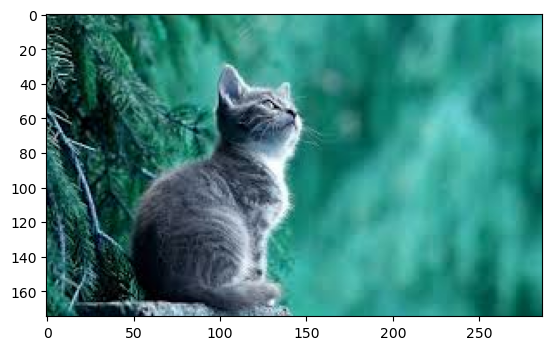

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(175, 287, 3)

In [45]:
test_img = cv2.resize(test_img,(256,256))

In [46]:
import numpy as np
test_input = np.expand_dims(test_img, axis=0)  # Add an extra dimension to match the model input shape
#batch has only 1 image and this code convert it into 4d tensor.

In [47]:
# Make predictions
test_input = np.expand_dims(test_img, axis=0)  # Add an extra dimension to match the model input shape
predictions = model.predict(test_input)
print(predictions)

# Convert predictions to binary (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold based on your needs
binary_prediction = 1 if predictions[0][0] > threshold else 0

# Print the result
if binary_prediction == 1:
    print("The animal in the image is a CAT.")
else:
    print("The animal in the image is a DOG.")


1/1 [==============================] - 0s 43ms/step
[[1.]]
The animal in the image is a CAT.


In [48]:

# Evaluate the model on the test set
evaluation = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
accuracy = evaluation[1]

# Print the accuracy
print(f"Accuracy on the test set: {accuracy}")

156/156 [==============================] - 55s 354ms/step - loss: 0.3233 - accuracy: 0.8576
Accuracy on the test set: 0.8575721383094788
